## Fourier Series and Fourier Transforms

### Paul Anzel DATEDATEDATE

This is a fundamental techique in a lot of numerical analysis and engineering. The basic idea is this--we have some signal (perhaps some signal in time) and we want to understand what's going on. You could just draw the signal:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline

But one way to gain some insight into the data is to look at the sorts of frequencies you can see in the data--for example, in a year's$^*$ worth of data, is the weekly-rise and fall very prominent? Or when Victor Wooten plucks a string, what frequencies you do hear?

$^*$You'd actually want to clip to 52 weeks, I'll explain why in a bit.

In [28]:
# Some nice overtones starting 2:14
from IPython.display import YouTubeVideo, Image
YouTubeVideo('nt0C9DZT0qo')

The Fourier series is a way to decompose a signal into a bunch of sine and cosine waves, based on three principles:

- For some continuous function $f(t)$ between 0 and $T$, $\lim_{n \rightarrow \infty}\sum_{k = 0}^n a_k \cos (2\pi k t/T) + b_k \sin (2\pi k t/T) = f(t)$. If $f(t)$ is piece-wise continuous, it'll limit to the function and then interpolate between the breaks (with ringing at finite $n$, called the [Gibbs phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon)).

- $\int_0^T \sin(2\pi m t/T) \sin(2\pi n t/T) dt = 0 \text{ if } m \neq n$ ($m$ and $n$ are integers). Similarly $\int_0^T \cos(2\pi m t/T) \cos(2\pi n t/T) dt = 0 \text{ if } m \neq n$. And you get zeros when combining sines and cosines.

- $\int_0^T \sin(2\pi m t/T)^2 dt = T/2$

So basically, you take the integrals $(2/T)\int_0^T f(t) \sin(2\pi m t/T) dt$ and $(2/T)\int_0^T f(t) \sin(2\pi m t/T) dt$, and you'll get $a_m$ and $b_m$ respectively.

For an example, let's talk about a square wave.

(-5, 5, -2, 2)

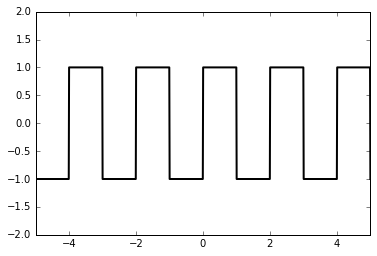

In [17]:
x_square = np.linspace(-5, 5, num=1000)
y_square = np.power(-1, np.floor(x_square))
plt.plot(x_square, y_square, color='k', linewidth=2)
plt.axis((-5, 5, -2, 2))

You can tell it sounds different from just a simple wave.

In [5]:
YouTubeVideo('uIuJTWS2uvY', start=60)

But to figure out how it sounds different, let's look at the Fourier coefficients. For simplicity, let's look at between -1 and 1 in the example above (since this is periodic, we can shift our window around as we like, we'll just change how things are distributed between the sines and cosines).

$f(t) = -1 \text{ when }-1<t\leq0, 1 \text{ when }0<t\leq1$

Because this function is odd, all the cosine terms will be zero.

As for the $b_k$ sine terms:

$$ b_k = \frac{2}{2}\int_{-1}^{1}\text{Square}(t) \sin(2\pi k t/2) dt$$
$$ b_k = -\int_{-1}^{0} \sin(\pi k t) dt + \int_{0}^{1} \sin(\pi k t) dt$$
$$ b_k = -\left[ \frac{\cos(\pi k t)}{\pi k} \right]_{0}^{-1} + -\left[ \frac{\cos(\pi k t)}{\pi k} \right]_{0}^{1}$$
$$ b_k = \frac{1}{\pi k} \left(2 -  2 \cos(\pi k)\right)$$

If $k$ is even, this becomes $2 - 2 = 0$. If $k$ is odd, this becomes $4/\pi k$. As a Fourier series, our square wave is written as

$$ \text{Square}(t) = \frac{4}{\pi} \left( \frac{1}{1} \sin (\pi t) + \frac{1}{3} \sin (3 \pi t) + \frac{1}{5} \sin (5 \pi t) + \frac{1}{7} \sin (7 \pi t) + \cdots \right)$$

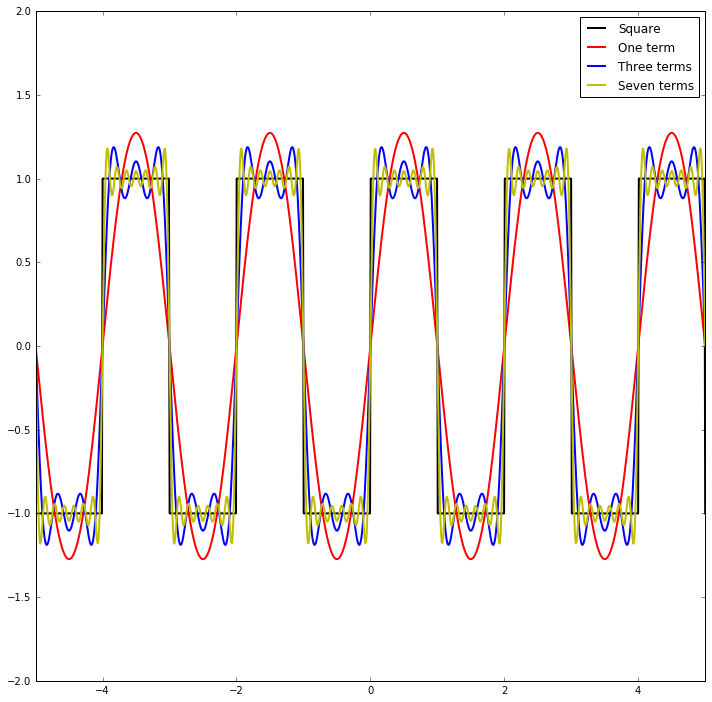

In [25]:
one_sine = (4/np.pi)*(np.sin(np.pi*x_square))
three_sines = (4/np.pi)*(np.sin(np.pi*x_square)
                          + (1.0/3)*np.sin(3*np.pi*x_square)
                          + (1.0/5)*np.sin(5*np.pi*x_square))
seven_sines = (4/np.pi)*(np.sin(np.pi*x_square)
                          + (1.0/3)*np.sin(3*np.pi*x_square)
                          + (1.0/5)*np.sin(5*np.pi*x_square)
                          + (1.0/7)*np.sin(7*np.pi*x_square)
                          + (1.0/9)*np.sin(9*np.pi*x_square)
                          + (1.0/11)*np.sin(11*np.pi*x_square)
                          + (1.0/13)*np.sin(13*np.pi*x_square))

plt.figure(figsize=(12,12))
plt.plot(x_square, y_square, color='k', linewidth=2, label='Square')
plt.plot(x_square, one_sine, color='r', linewidth=2, label='One term')
plt.plot(x_square, three_sines, color='b', linewidth=2, label='Three terms')
plt.plot(x_square, seven_sines, color='y', linewidth=2, label='Seven terms')
plt.axis((-5, 5, -2, 2))
plt.legend()

So, if we had a square-wave at C4 (middle-C) we'd also be hearing the notes G5, E6, B$\flat$6, D7,... while the sine wave is only C4.

Generally you won't care about the exact values of $a_k$ and $b_k$ but their combinations for a given $k$. We'll talk about the amplitude $A_k = \sqrt{a_k^2 + b_k^2}$ and the phase $\phi_k = \text{atan2}(a_k, b_k)$.$^*$

Often to do both computations at once, people will use $e^{i 2\pi k t/T} = \cos(2\pi k t/T) + i\sin(2\pi k t/T)$, and so the real part of the coefficients is the cosine part and the imaginary part of the coefficents is the sine part. This also makes the whole amplitude and phase part more clear.

$^*$ $\text{atan2}(x, y)$ is basically the $\arctan(x/y)$ function, but deals with cases where $y$ could be zero intelligently. Use numpy.arctan2 or math.atan2.

Realistically, most data you have is not going to have some easy calculation you can do like above, and you're going to do some sort of numerical integration.

In [26]:
### DON'T DO THIS IN REAL CODE! THERE'S A MUCH BETTER ALGORITHM BELOW!
def num_FS(f, numterms=10):
    # Use sp.integrate.cumtrapz
    pass

### Fourier Transform

http://www.johndcook.com/blog/fourier-theorems/

### Discrete Fourier Transform and the FFT

In reality, the data you get is usually going to be a series of discrete points and over a limited period of time. So we're going to pretend like the data is either periodic (like a Fourier series) and the integrals turn into sums.

$$ \mathcal{F}(f)(\nu) = \int_0^T f(t) e^{-i 2 \pi \nu t} dt \Rightarrow \sum_{t_k} f(t_k) e^{-i 2 \pi \nu t_k}$$

However, there's a vital algorithm called the Fast Fourier Transform that does this quickly (computer time from $O(N^2)$ to $O(N \log N$). However, some caveats:

- You only get benefits if your data array is a highly composite number--computing time goes like the sum of the prime factors. So if your data is an array of length 263 (which is prime) it'll be over 10 times slower than an array of length 264 ($264 = 2 \times 2 \times 2 \times 3 \times 11$, so compute time is like $2 + 2 + 2 + 3 + 11 = 20$).

-

-

### Shannon-Nyquist Sampling Theorem and Resolution

When we're trying to collect data, we have two questions:

- How often should we measure?

- How long should we measure?

Or, alternately, we're limited in one way or another for these two questions and we want to know the best we can do is work with these limits.

The first question is answered by the Shannon-Nyquist Sampling Theorem. This says that for sampling frequency $f_s$, the highest frequencies you can measure are $\nu < f_s/2$.

(Proof by drawing).

If you do have things happening at higher frequencies, these show up as lower frequency artefacts, a phenomenon known as [aliasing](https://en.wikipedia.org/wiki/Aliasing).

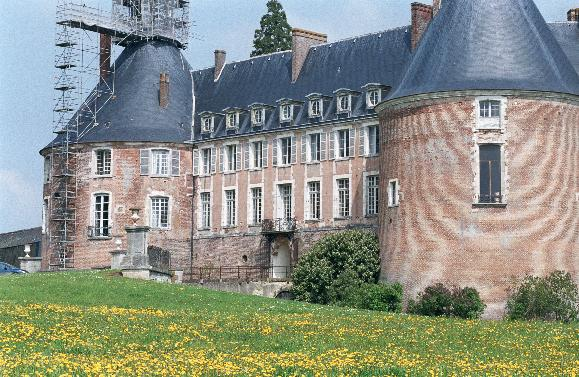

In [29]:
# Image from https://svi.nl/AntiAliasing
Image('Aliased_image.jpg')

Uncertainity, on the other hand, tells us that if you've sampled for length (of time, of space...) $T$, then sampling resolution you get is $\Delta \nu = 1/T$. We could see this in our definition of the Fourier Series above, but a nice heuristic is that if you had two signals that are *almost* the same frequency, you'd have to look for a long time to be able to see whether or not the two signals will change.

So, an example--let's say I was looking at stock data and I wanted to see how much things are changing hour to hour. I would then want to sample every 29 minutes (and probably some integer amount). If I wanted to clearly distinguish between a cycle that happens every month and that happens every 1.5 months (so $\Delta \nu = 0.5 \text{ months}^{-1}$ you're going to need 2 months worth of data.

There is a way to beat the Nyquist Theorem in something called Compressed Sampling, but this is something for another time.